<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Credit Card Fruad Detection| Modeling | 99% Acc </p>

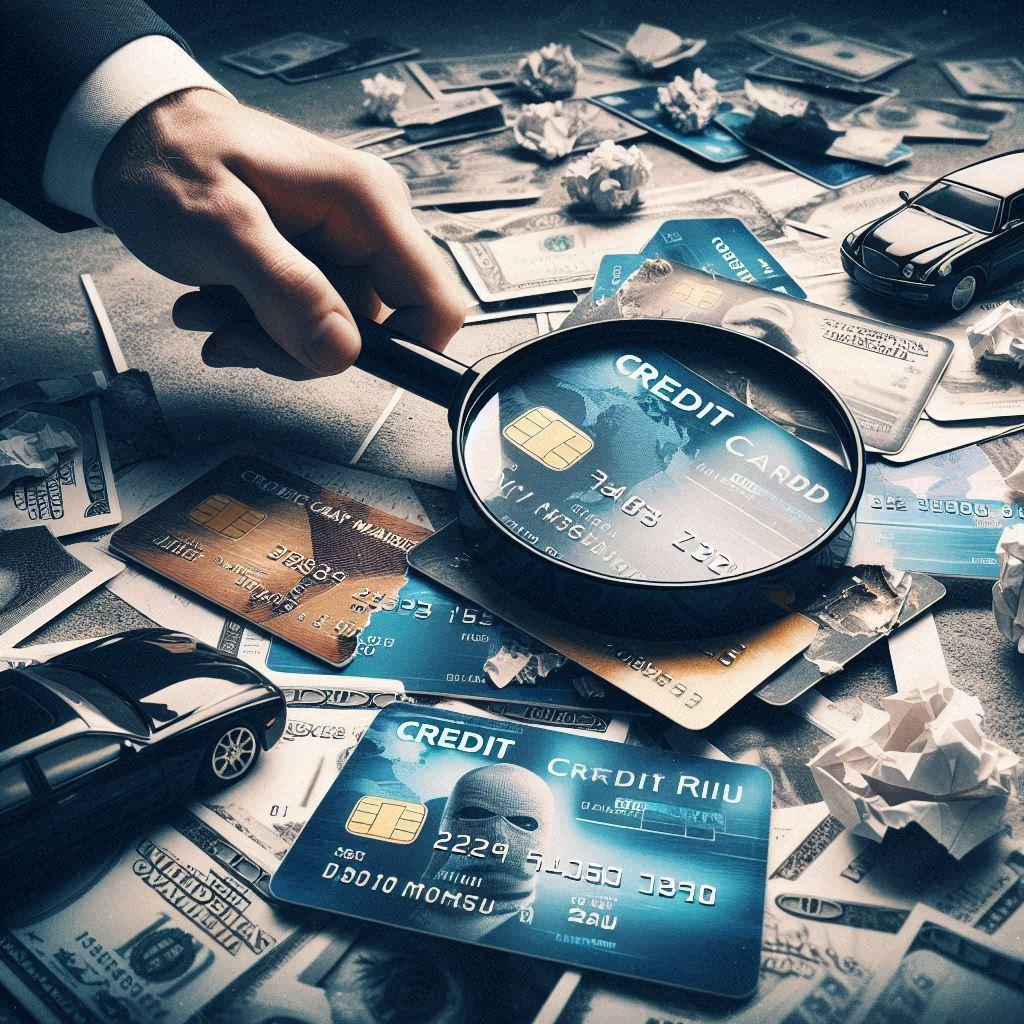

**Aims :**
- ***Basic Aim is To Get Knowldge and Provide My Best Modeling On this.***
- ***I will Do Some Basic EDA Analysis and Some Basic Preprocessing.***
- ***The Modeling Part Contains Some Basic Modeling and Some Evaluations.***
- ***If You Like The Modeling Share your Feedback , How to Improve It More or What you Like The Most.***

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">About Data</p>

<div style="border: 2px solid #ADEFD1FF; padding: 10px; max-width: 1500px;">
    <h3 style="color:#ADEFD1FF; font-weight:bold;">ABOUT THE AUTHOR</h3>
    <p>
        I am <b>Pavitr</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of #KeepLearning and #KeepSupporting, as I am committed to constant growth and uplifting others in the field.
    </p>
    <div style="text-align: center;">
        <img src=""C:\Users\Pavitr kumar\OneDrive\Pictures\EVENT\Freshers\Praneeth clicks\WhatsApp Image 2024-10-28 at 23.42.50_478466ef.jpg"https://media.licdn.com/dms/image/D4D03AQEho5bPVChHpA/profile-displayphoto-shrink_100_100/0/1712892057663?e=1720051200&v=beta&t=9LuEqrMOFJvp8-xxHRG2SCaYpI28dUemihllpvUFZRk" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%; border: 2px solid #D35400;"><br>
    </div>
    <p>
        You can find more about me on my <a href="https://github.com/Pavitr-Swain" target="_blank">GitHub</a> and <a href="https://www.linkedin.com/in/pavitr-kumar-swain-ab708b227/" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

## About Dataset

**Description:**
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

**Key Features:**
- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

**Potential Use Cases:**
1. **Credit Card Fraud Detection:** Build machine learning models to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.
2. **Merchant Category Analysis:** Examine how different merchant categories are associated with fraud.
3. **Transaction Type Analysis:** Analyze whether certain types of transactions are more prone to fraud than others.

**Data Source:** The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines.


<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 1 | Importing Data & Libraries</p>

In [1]:
# Import Basis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Train 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
# Classifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
# Optuna
import optuna
# Paellete
# palette = ["#00B1D2FF", "#FDDB27FF"]
# palette = ['#D7A9E3FF', '#8BBEE8FF', '#A8D5BAFF']
palette = ["#00203FFF", "#ADEFD1FF"]

color_palette = sns.color_palette(palette)
# Remove Warnings
import warnings 
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 2 | Loading Data</p>

In [2]:
#Train Data 
tr_d = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')

In [3]:
# Dropped Unnamed: 12
tr_d.drop('id',axis = 1 , inplace = True)

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 3 | Data Overview </p>

**Use Case Of this Function**

- This Function Will Help to Load and Give a Overview of Data.
- This Functions Takes Data as Inputs and Given all the Information about Data Like Head , shape , Info , Describe , Null Values and Duplicates Values etc.

In [4]:
# Text Color
def PrintColor(text: str, color=Fore.CYAN, style=Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

# Text For Main Heading
def print_blue_large(text):
    PrintColor(text, Fore.BLUE + Style.BRIGHT)

# Main Heading
def print_boxed_blue_heading(text):
    length = len(text) + 4
    print(f"\n{Style.BRIGHT}{Fore.BLUE}{'='*length}{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.BLUE}| {text} |{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.BLUE}{'='*length}{Style.RESET_ALL}")

# Function to Overview Data
def data_overview(tr_d):

    # Display head of the training dataset nicely
    print_boxed_blue_heading("The Head Of Train Dataset is:")
    display(HTML(tr_d.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">')))

    print('\n')

    # Shapes of Train and Test
    print_boxed_blue_heading("Shape Information:")
    PrintColor(f"The Shape Of Train Data is {tr_d.shape} || No of Rows is : {tr_d.shape[0]} and Columns is {tr_d.shape[1]}", Fore.CYAN)
    print('\n')

    # Info of Both Datasets
    print_boxed_blue_heading("Dataset Information:")
    PrintColor(f"\nThe Info Of Train Dataset", Fore.CYAN)
    tr_d.info()

    # Describe Both
    print_boxed_blue_heading("Numerical Summary:")
    PrintColor(f"\nThe Numerical Summary of Train is", Fore.CYAN)
    display(tr_d.describe().style.set_caption("Train Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'blue')]}]))

    # Null Values in Train and Test
    print_boxed_blue_heading("Null Values:")
    PrintColor("\nNull Values in Train", Fore.CYAN)
    print(tr_d.isnull().sum())
    print('\n')

    # Duplicates Values in Train and Test
    print_boxed_blue_heading("Duplicate Values:")
    PrintColor("\nDuplicates Values in Train", Fore.CYAN)
    print(tr_d.duplicated().sum())

In [5]:
# Data Overview
data_overview(tr_d)


| The Head Of Train Dataset is: |


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0





| Shape Information: |
The Shape Of Train Data is (568630, 30) || No of Rows is : 568630 and Columns is 30



| Dataset Information: |

The Info Of Train Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,12041.957635,0.500000
std,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,6919.644449,0.500000
min,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,-3.163276,-5.954723,-2.020399,-5.955227,-2.107417,-3.861813,-2.214513,-2.484938,-2.421949,-7.804988,-78.147839,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.010000,0.000000
25%,-0.565286,-0.486678,-0.649299,-0.656020,-0.293496,-0.445871,-0.283533,-0.192257,-0.568745,-0.590101,-0.701449,-0.831133,-0.696667,-0.873206,-0.621249,-0.716265,-0.619491,-0.556046,-0.565308,-0.350240,-0.166441,-0.490489,-0.237629,-0.651580,-0.554148,-0.631895,-0.304961,-0.231878,6054.892500,0.000000
50%,-0.093638,-0.135894,0.000353,-0.073762,0.081088,0.078718,0.233366,-0.114524,0.092526,0.262614,-0.041050,0.162052,0.017608,0.230501,-0.039256,0.134026,0.271641,0.087294,-0.025979,-0.123378,-0.037431,-0.027329,-0.059689,0.015901,-0.008193,-0.011892,-0.172911,-0.013930,12030.150000,0.500000
75%,0.832658,0.343555,0.628538,0.707005,0.439737,0.497788,0.525955,0.047299,0.559262,0.592460,0.747773,0.744672,0.685605,0.751822,0.665406,0.655606,0.518224,0.544389,0.560116,0.248216,0.147979,0.463882,0.155715,0.700737,0.550015,0.672888,0.334023,0.409590,18036.330000,1.000000
max,2.229046,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,31.722709,2.513573,17.913556,7.187486,19.169544,14.532202,46.652906,6.994124,6.783716,3.831672,29.872812,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.000000



| Null Values: |

Null Values in Train
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



| Duplicate Values: |

Duplicates Values in Train
1


**Data Have No Null Values and Have Some Duplicates**

In [6]:
# Drop Duplicates 
tr_d.drop_duplicates(inplace=True)

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 4 | EDA Analysis</p>

In [7]:
# # Function to Plot Single Pie and Bar Plot
def single_plot_distribution(column_name, dataframe):
    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]}) 

    # Donut pie chart
    pie_colors = palette[0:3]
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16)

    # Bar chart
    bar_colors = palette[0:3]
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=bar_colors,) 
    ax2.set_title(f'Count of {column_name}', fontsize=16)
    ax2.set_xlabel(column_name, fontsize=14)
    ax2.set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    plt.show()

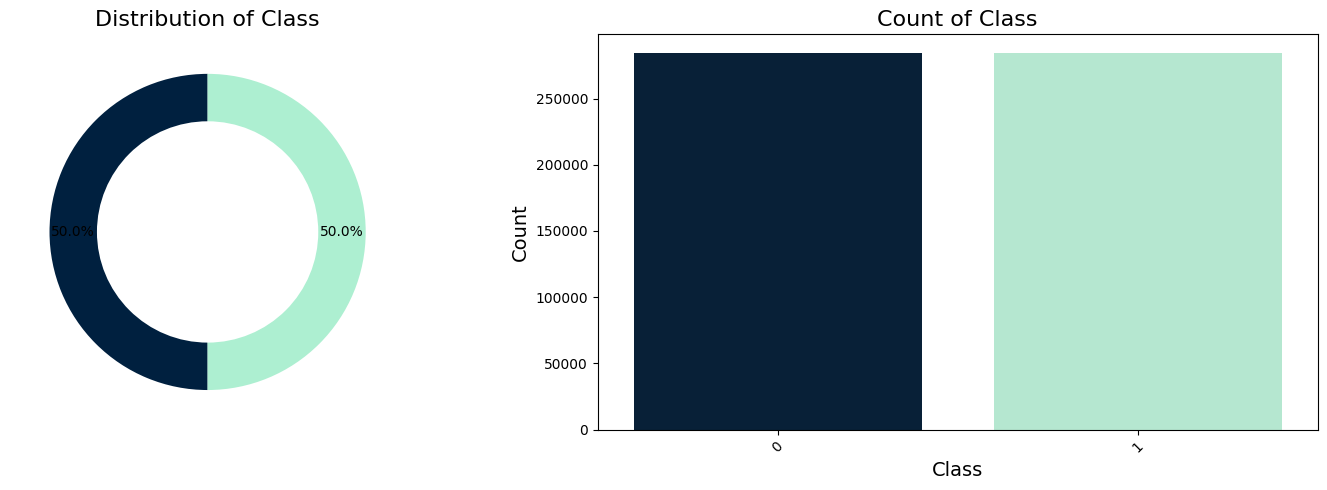

In [8]:
# Class Ditribution
single_plot_distribution('Class',tr_d)

In [ ]:
# Cols to Plot 
columns_to_plot =['V1', 'V2', 'V3', 'V4','Class']

# Data Columns
data_to_plot = tr_d[columns_to_plot]

# Create a dictionary to map colors to unique values of the 'Quality' column
Q_colors = { 0 : palette[0], 1 : palette[1], 'other': 'gray'}  

# Creating the pairplot with the specified palette for categorical variables
sns.pairplot(data_to_plot, hue='Class', palette=Q_colors)
plt.show()

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 5 | Outlier Dedection</p>

In [ ]:
# Num _COLS 
NUM_COLS_F =[col for col in tr_d.columns if tr_d[col].dtype == 'float']

# Define the number of rows and columns for subplots
num_rows = 5  # 4 rows
num_cols = 5  # 4 columns

# Create subplots with appropriate titles
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 17))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a box plot
for i, col in enumerate(NUM_COLS_F[:num_rows * num_cols]):
    sns.boxplot(x=tr_d[col], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(col)

# Hide empty subplots
for i in range(len(NUM_COLS_F), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 6 | Numerical Feature Distribution </p>

In [ ]:
# Function to Plot Numerical Distribution 
def plot_numerical_distribution_with_hue(data, num_cols, hue_col='Gender', figsize=(25, 25), dpi=100):
    # Create subplots
    rows = (len(num_cols) + 1) // 2 
    fig, ax = plt.subplots(rows, 2, figsize=figsize, dpi=dpi)
    ax = ax.flatten() 
        # Loop through each column and plot the distribution with hue
    for i, column in enumerate(num_cols):  
        sns.histplot(data=data, x=column, hue=hue_col, ax=ax[i], kde=True, palette=palette)
        ax[i].set_title(f'{column} Distribution', size=14)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)
        
        # Calculate skewness
        skewness = skew(data[column].dropna())
        skew_label = f'Skewness: {skewness:.2f}'
        
        # Add skewness annotation
        ax[i].annotate(skew_label, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')
    
    # Remove any extra subplots
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])
    
    # Set Tight Layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:
# Cols to Plot
NUM_COLS_F = ['V1','V2','V3','V4','V5','V22','V23','V24','V25','V26','V27','V28']
# Numerical Distribution of Age Vs Fare
plot_numerical_distribution_with_hue(tr_d,NUM_COLS_F,'Class')

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 6.1 | Normalization</p>

In [ ]:
# Function to Scale Data
def apply_scaling(data, columns, scaler_type):
    # Check the type of scaler and initialize the appropriate scaler object
    if scaler_type == 'S':
        scaler = StandardScaler()  # Initialize StandardScaler
    elif scaler_type == 'M':
        scaler = MinMaxScaler()  # Initialize MinMaxScaler
    elif scaler_type == 'Q':
        scaler = QuantileTransformer(output_distribution='normal')  # Initialize QuantileTransformer
    else:
        raise ValueError("Invalid scaler type. Choose 'S' for StandardScaler, 'M' for MinMaxScaler, or 'Q' for QuantileTransformer.")

    # Create a copy of the input data to avoid modifying the original data
    scaled_data = data.copy()

    # Loop through each column to be scaled
    for col in columns:
        # Apply the scaler to the current column and update the data with the scaled values
        scaled_data[col] = scaler.fit_transform(scaled_data[[col]])

    # Return the scaled data
    return scaled_data

In [ ]:
# Specify columns and scaler type
columns_to_scale =[col for col in tr_d.columns if tr_d[col].dtype == 'float']
scaler_type = 'M' 

# Apply scaling to training data
tr_d = apply_scaling(tr_d, columns_to_scale, scaler_type)
PrintColor('Data Scaled Done')

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 7 | Correlation Analysis</p>

In [ ]:
# Select only numeric columns
N_d = tr_d.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = N_d.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap=palette, fmt=".1f", linewidths=0.5)
plt.title('Correlation Plot', fontsize=22)  
plt.tight_layout()  
plt.show()

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Step 8 | Model Building </p>

- ***The First Major Step Befor Modeling is To Split Data Into Train and Testing. Okay Now Let Me Tell You How You Can Split the Data , X Variable Contains All Tha Independent Variable , and y Contains Dependent Variable.***
- ***We Drop The Target Variable and Select Other all as X and y Contains Only The target variabel.***
- ***The We Use The Train_test_split Function to Split Data Into Train and Test.***

In [ ]:
# # # =================================================================================================================
# # #                         X < y 
# # #================================================================================================================== 
X_T = tr_d.drop('Class', axis=1)
y_T = tr_d['Class']
# # # =================================================================================================================
# # #                         Train < Test Split
# # #================================================================================================================== 
X_TR, X_TE, Y_TR, Y_TE = train_test_split(X_T, y_T, test_size=0.1, random_state=42)

# # # =================================================================================================================
# # #                         Shapes < 
# # #================================================================================================================== 
PrintColor(f"Training set shape - X: {X_TR.shape}, y: {Y_TR.shape}")
PrintColor(f"Testing set shape - X: {X_TE.shape}, y: {Y_TE.shape}")

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:100%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Base Classifier</p>

- ***This Section Contain The Base Classifier, Well Now In this Section , we will Intilize The Base Classifier , With Some Basic Parameters.***
- ***Now You Thinks , What is a Classifier , and How we Know Which Classifier is Best to Use , Okay I Have a Solution to Your Problem , Here a Link of My Notebook [https://www.kaggle.com/code/abdmental01/selecting-best-model] . Well Now You think Why I'm refering to my Notebook , In this Notebook , You find Some Good Functions to Select the Best Model According to Your Data.***

In [ ]:
# Initlize Models
# XGB Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
# CatBoost Classifier
catboost = CatBoostClassifier(iterations=100, random_state=42 , verbose = 0)
# LightGBM Classifier
lgb_params = {
 'n_estimators': 890,
 'learning_rate': 0.7019434172842792,
 'max_depth': 19,
 'reg_alpha': 1.2057738033316066,
 'reg_lambda': 0.18598174484559382,
 'num_leaves': 3,
 'subsample': 0.746154395882518,
 'colsample_bytree': 0.3877680559022922
}
lgbm = LGBMClassifier(**lgb_params, random_state=42 , verbose = -1)
#___________________________________________________________________
print_boxed_blue_heading('Hurry ! Base Clfs Are Intilized')

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:100%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Fitting Classifier</p>

***In this Section , We Will Fit the Base Classifier On training Data and also Do Prediction on Testing Data.***

In [ ]:
# Fitting Each Model One by One 
# 1. XGB Classifier
xgb.fit(X_TR ,Y_TR)
# Pred 
xgb_pred = xgb.predict(X_TE)
#-----------------------------
# 2. CatBoost Classifier
catboost.fit(X_TR, Y_TR)
# Pred
catboost_pred = catboost.predict(X_TE)
#-----------------------------
# 3. LightGBM Classifier
lgbm.fit(X_TR, Y_TR)
# Pred
lgbm_pred = lgbm.predict(X_TE)
#-----------------------------
print_boxed_blue_heading('Hurry ! Model Are Fitted')

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:100%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Evaluating Classifier</p>

***In this Section , We Will Do Evaluation , So I made a Function to Evaluate The Data , This Function Takes , Test Data and Prediction and in Retrun it Provides :***
- Accuracy 
- Precision
- Confusion Matrix

In [ ]:
# Evalate Results
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, confusion

In [ ]:
# XGB Classifier
accuracy_XGB, precision_XGB, confusion_XGB = evaluate(Y_TE, xgb_pred)
print_boxed_blue_heading("Evaluation Results for XGB Classifier")
PrintColor(f"The Accuracy Score Of XGB Classifier is {accuracy_XGB}, Precision Is {precision_XGB},\nConfusion Matrix is \n{confusion_XGB} ")
print("\n")

# CatBoost Classifier
accuracy_Cat, precision_Cat, confusion_Cat = evaluate(Y_TE, catboost_pred)
print_boxed_blue_heading("Evaluation Results for CatBoost Classifier")
PrintColor(f"The Accuracy Score Of CatBoost Classifier is {accuracy_Cat}, Precision Is {precision_Cat},\nConfusion Matrix is \n{confusion_Cat} ")
print("\n")

# LightGBM Classifier
accuracy_LGBM, precision_LGBM, confusion_LGBM = evaluate(Y_TE, lgbm_pred)
print_boxed_blue_heading("Evaluation Results for LightBoost Classifier")
PrintColor(f"The Accuracy Score Of CatBoost Classifier is {accuracy_LGBM}, Precision Is {precision_LGBM},\nConfusion Matrix is \n{confusion_Cat} ")
print("\n")

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:100%; font-family:Monospace; text-align:center; border-radius:15px 50px;">Storing Reults in DF and Visualizing the Results</p>

In [ ]:
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Accuracy': [accuracy_XGB, accuracy_LGBM, accuracy_Cat],
    'Precision': [precision_XGB, precision_LGBM, precision_Cat]
}

# Create a dataframe
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the dataframe based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

# Display the sorted dataframe
evaluation_df

In [ ]:
# Define the models, accuracies, and precisions
models = ['XGBoost', 'LightGBM', 'CatBoost']
accuracies = [accuracy_XGB, accuracy_LGBM, accuracy_Cat]
precisions = [precision_XGB, precision_LGBM, precision_Cat]

# Create a DataFrame
data = {'Model': models, 'Accuracy': accuracies, 'Precision': precisions}
df = pd.DataFrame(data)

# Define custom color palette
custom_palette = sns.color_palette("Paired")

# Plot using Seaborn
plt.figure(figsize=(20, 8))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette=palette[0:2])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Subplot 2: Precision
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Precision', data=df, palette=palette[0:2])
plt.title('Model Precisions')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<a id="Import"></a>
# <p style="background-color: #ADEFD1FF; font-family:calibri; color:#00203FFF; font-size:140%; font-family:Monospace; text-align:center; border-radius:15px 50px;">The End</p>

#### **Here Some My Recent Work Which may be Helpfull For You.**
- https://www.kaggle.com/code/abdmental01/taxi-tales-exploring-the-urban-journey >>>>> [ **Taxis Analysis** ]
- https://www.kaggle.com/code/abdmental01/delicious-delights-exploring-online-food >>> [ **Online Food Analysis** ]
- https://www.kaggle.com/code/abdmental01/unlocking-insights-obesity-risk-analysis >>> [ **Obesity Risk Analysis** ]